In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
Company_Data=pd.read_csv("company_data.csv")
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [16]:
Company_Data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [17]:
Company_Data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [18]:
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [19]:
# model.fit function does not consider string , so attribute ShelveLoc converted into int 
Company_Data['ShelveLoc'], class_name=pd.factorize (Company_Data['ShelveLoc']) 

In [20]:
Company_Data.ShelveLoc
print(class_name)

Index(['Bad', 'Good', 'Medium'], dtype='object')


In [21]:
# model.fit function does not consider string , so attribute Urban converted into int 
Company_Data['Urban'], class_name2=pd.factorize(Company_Data['Urban'])
Company_Data.Urban
print(class_name2)

Index(['Yes', 'No'], dtype='object')


In [24]:
# model.fit function does not consider object/string , so attribute US converted into int 
Company_Data['US'].replace(to_replace=['Yes','No'],value=['0','1'], inplace=True)
Company_Data.US
print(Company_Data['US'].unique())

['0' '1']


In [25]:
Company_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 34.5+ KB


In [26]:
# converting target varialbe into catagorical , as required in question
catagory=pd.cut(Company_Data.Sales,bins=[0,5.39,9.32,17], labels=['low','moderate','high'])

# adding a new attribute Sales_Group having catagorical value of Sales 
Company_Data.insert(0,'Sales_Group',catagory)


In [27]:
# droping variable Sales as , we have already converted it into catagorical variable 'Sales_Group'
Company_Data.drop(['Sales'],axis=1,inplace=True)

In [28]:
Company_Data['Sales_Group'].unique()

[high, moderate, low, NaN]
Categories (3, object): [low < moderate < high]

In [29]:
Company_Data[Company_Data['Sales_Group'].isna()]

,Sales_Group,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,NaN,139,24,0,358,185,2,79,15,1,1


In [30]:
Company_Data.shape

(400, 11)

In [31]:
Company_Data.Sales_Group.value_counts()

moderate    201
high         99
low          99
Name: Sales_Group, dtype: int64

In [32]:
# drop one row having Sales_Group NaN, as it won't be considered in model.fit function
Company_Data=Company_Data.dropna()

In [33]:
Company_Data.reset_index(drop=True)

,Sales_Group,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,0,0
1,high,111,48,16,260,83,1,65,10,0,0
2,high,113,35,10,269,80,2,59,12,0,0
3,moderate,117,100,4,466,97,2,55,14,0,0
4,low,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
394,high,138,108,17,203,128,1,33,14,0,0
395,moderate,139,23,3,37,120,2,55,11,1,0
396,moderate,162,26,12,368,159,2,40,18,0,0
397,moderate,100,79,7,284,95,0,50,12,0,0


In [34]:
Company_Data.shape

(399, 11)

In [35]:
colnames=list(Company_Data.columns)
colnames

['Sales_Group',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [37]:
predictors=colnames[1:] # excluding first columns other are predictor for our DT
predictors

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [38]:
target=colnames[0]  # this is our target variable
target

'Sales_Group'

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
help (DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [40]:
train,test=train_test_split(Company_Data,test_size=0.2,random_state=10)

In [41]:
test


,Sales_Group,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
333,moderate,136,60,7,303,147,2,41,10,0,0
111,moderate,132,118,12,272,151,2,43,14,0,0
352,high,133,103,14,288,122,1,61,17,0,0
206,low,162,67,0,27,160,2,77,17,0,0
56,high,133,82,0,54,84,2,50,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...
305,moderate,115,29,26,394,132,2,33,13,0,0
188,moderate,116,37,0,426,90,2,76,15,0,1
166,moderate,119,67,17,151,137,2,55,11,0,0
64,moderate,100,67,12,184,104,2,32,16,1,0


In [42]:
train

,Sales_Group,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
304,high,123,98,12,408,134,1,29,10,0,0
367,high,95,106,0,256,53,1,52,17,0,1
149,high,121,120,13,140,87,2,56,11,0,0
100,low,113,69,11,94,106,2,76,12,1,0
176,moderate,138,107,9,480,154,2,47,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...
370,moderate,126,41,22,403,119,0,42,12,0,0
321,moderate,123,39,5,499,98,2,34,15,0,1
15,moderate,149,95,5,400,144,2,76,18,1,1
125,high,89,78,0,181,49,2,43,15,1,1


In [55]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [56]:
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [57]:
preds=model.predict(test[predictors])

In [58]:
preds

array(['moderate', 'moderate', 'high', 'moderate', 'high', 'low', 'high',
       'low', 'moderate', 'moderate', 'moderate', 'high', 'moderate',
       'moderate', 'low', 'moderate', 'moderate', 'moderate', 'moderate',
       'moderate', 'low', 'moderate', 'moderate', 'high', 'moderate',
       'low', 'moderate', 'high', 'moderate', 'low', 'high', 'moderate',
       'moderate', 'high', 'moderate', 'moderate', 'high', 'moderate',
       'moderate', 'moderate', 'high', 'low', 'high', 'moderate', 'high',
       'high', 'moderate', 'high', 'moderate', 'moderate', 'low',
       'moderate', 'low', 'high', 'moderate', 'high', 'low', 'moderate',
       'moderate', 'moderate', 'moderate', 'moderate', 'moderate',
       'moderate', 'moderate', 'moderate', 'high', 'low', 'moderate',
       'high', 'moderate', 'low', 'low', 'moderate', 'low', 'moderate',
       'high', 'moderate', 'moderate', 'moderate'], dtype=object)

In [59]:
from sklearn import metrics

In [60]:
print ("Accuracy :", metrics.accuracy_score(test[target],preds))

Accuracy : 0.5375


In [61]:
pd.Series (preds).value_counts()

moderate    47
high        19
low         14
dtype: int64

In [62]:
pd.crosstab(test[target],preds)

col_0,high,low,moderate
Sales_Group,,,
low,0,6,12
moderate,8,7,26
high,11,1,9


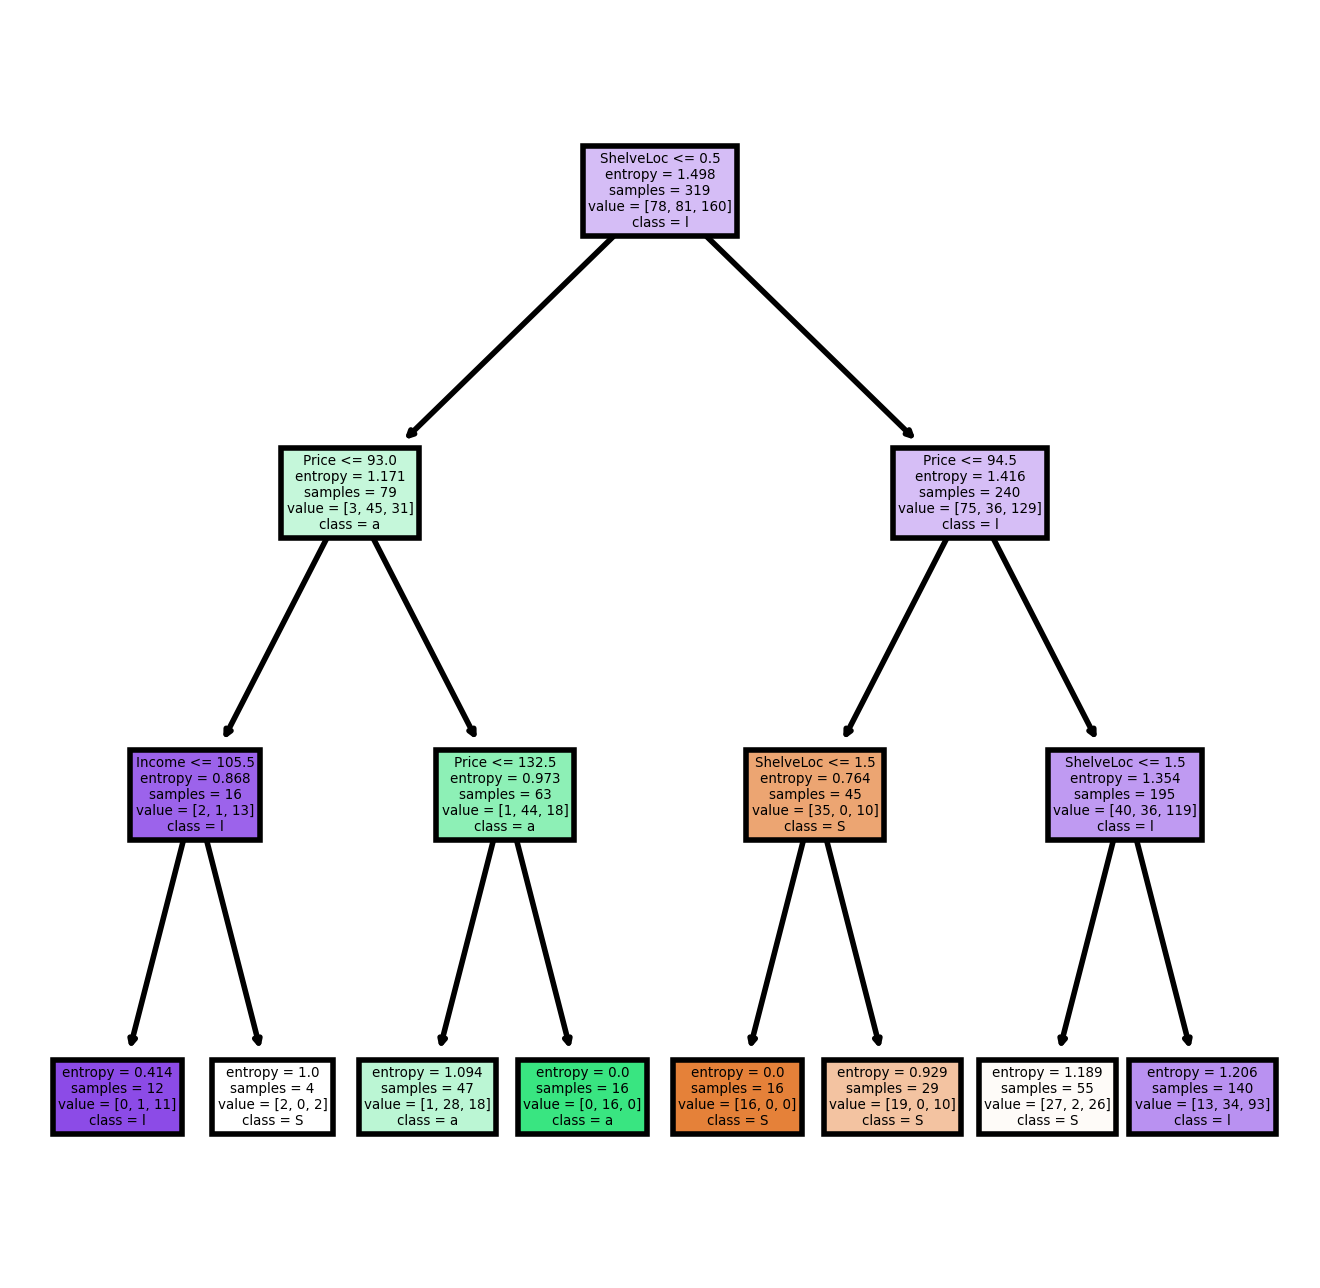

In [63]:

fig,axes= plt.subplots(nrows=1,ncols=1, figsize =(4,4),dpi=400)
tree.plot_tree(model)
tree.plot_tree(model,feature_names=predictors, class_names= target, filled=True);